# Decision Tree Example

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs = df.drop('salary_more_then_100k',axis='columns')
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [4]:
target = df['salary_more_then_100k']
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

le_company.fit(inputs['company'])
le_job.fit(inputs['job'])
le_degree.fit(inputs['degree'])

LabelEncoder()

In [6]:
le_company.inverse_transform([0,1,2])

array(['abc pharma', 'facebook', 'google'], dtype=object)

In [7]:
inputs_n = pd.DataFrame(data = le_company.transform(inputs['company']),columns=['company_n'])
inputs_n['job_n'] = le_job.transform(inputs['job'])
inputs_n['degree_n'] = le_degree.transform(inputs['degree'])
print(inputs_n)

    company_n  job_n  degree_n
0           2      2         0
1           2      2         1
2           2      0         0
3           2      0         1
4           2      1         0
5           2      1         1
6           0      2         1
7           0      1         0
8           0      0         0
9           0      0         1
10          1      2         0
11          1      2         1
12          1      0         0
13          1      0         1
14          1      1         0
15          1      1         1


In [16]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1234)

In [17]:
model.fit(inputs_n,target)

DecisionTreeClassifier(random_state=1234)

In [18]:
text_model = tree.export_text(model)
print(text_model)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 1.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- class: 0



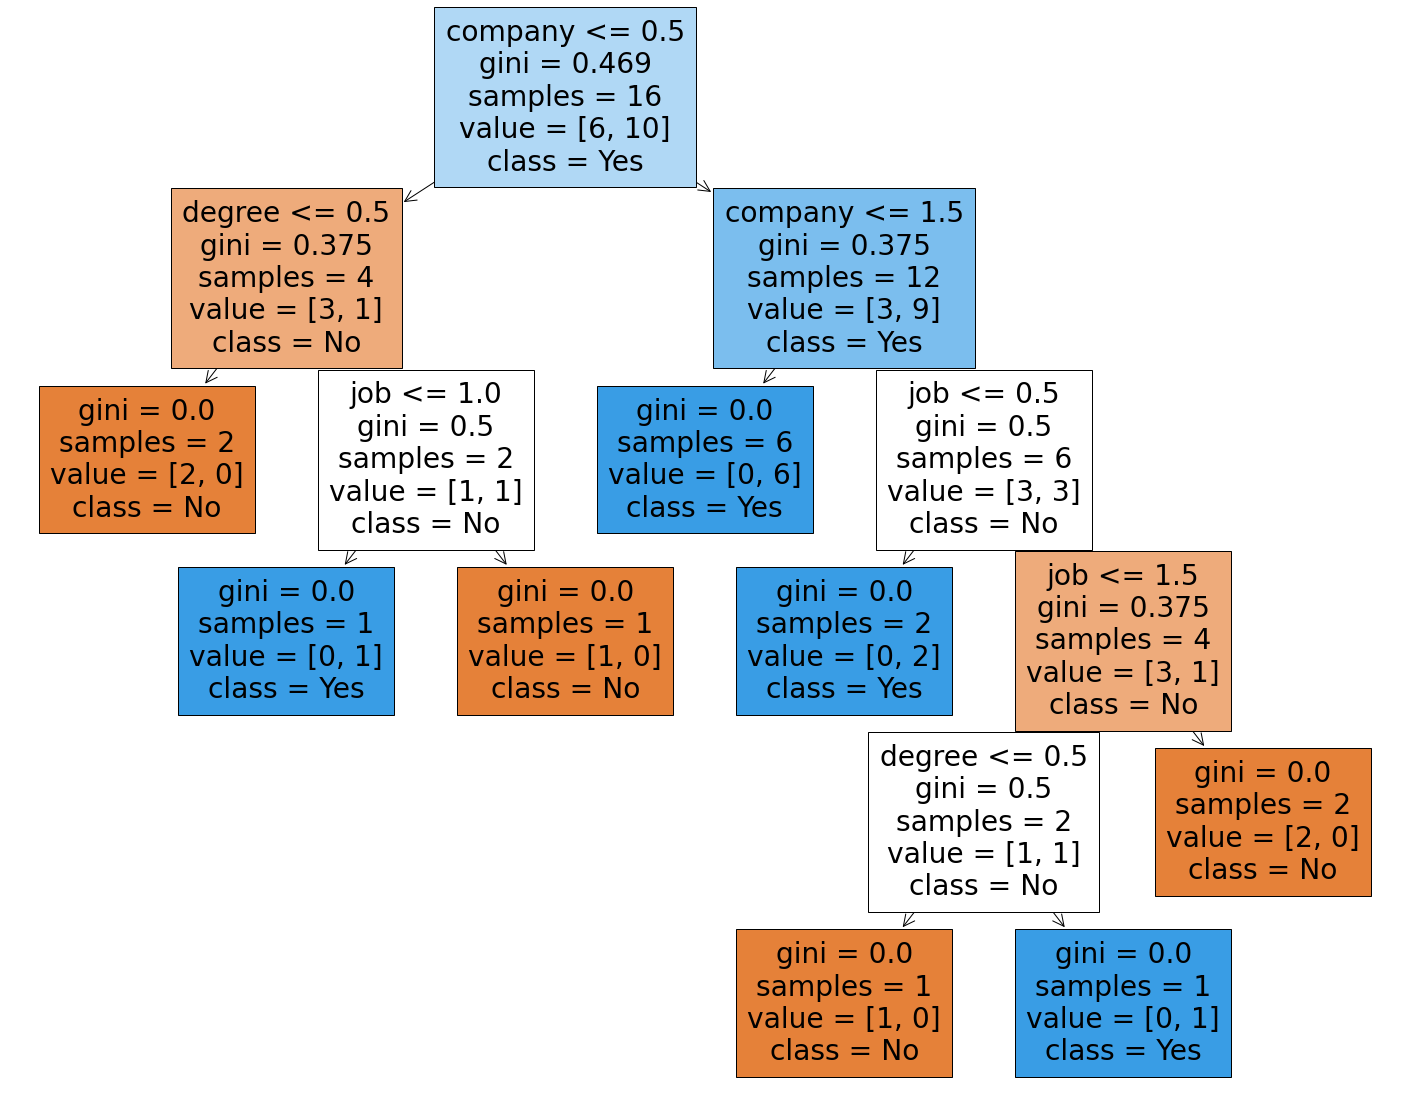

In [24]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize = (25,20))
_ = tree.plot_tree(model,filled=True,
                  feature_names = ['company','job','degree'],
                  class_names=['No','Yes'])

In [10]:
model.score(inputs_n,target)

1.0

In [11]:
test = [2,1,1]
y_hat = model.predict([test])

test_str = (list(le_company.inverse_transform([test[0]])),
list(le_job.inverse_transform([test[1]])),
list(le_degree.inverse_transform([test[2]])))

print(f'{test_str}: {y_hat}')

(['google'], ['computer programmer'], ['masters']): [1]


In [12]:
test = [2,1,1]
y_hat = model.predict([test])

test_str = (list(le_company.inverse_transform([test[0]])),
list(le_job.inverse_transform([test[1]])),
list(le_degree.inverse_transform([test[2]])))

print(f'{test_str}: {y_hat}')

(['google'], ['computer programmer'], ['masters']): [1]


# Exercise: Build decision tree model to predict survival based on certain parameters

df2 = pd.read_csv('titanic.csv')
df2.head()